# Python for (open) Neuroscience

_Lecture 3.4_ - Data visualization

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/lectures/Lecture3.4_Data-visualization.ipynb)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
import matplotlib as mpl


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.32
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

## Outline


 - Some theory
 - The basic plot _galateo_
 - Interactive plots
 - Configuring `matplotlib`
 - `matplotlib` hacks
 - `seaborn` hacks
 - 3D visualizations with `napari`

A great reference

![tufte_book](https://kurtgippert.cdn.bibliopolis.com/pictures/015820.jpg?v=1498601505)

## The data-to-ink ratio principle

    “Graphical excellence is that which gives 
    the greatest number of ideas in the shortest 
    time with the least ink in the smallest space”

When plotting, always strive to maximise the information-per-ink amount!

### A low hanging fruit: blow up dynamite plots

![dynamite](./files/dynamite.png)

For example, dynamite plots are the worst kind of plot:
Each bar is conveying only 2 numbers with a lot of space and ink! 

We'll be using `matplotlib` and `seaborn`:

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [30]:
np.random.seed(40)
data1 = np.abs(np.random.normal(0, 2, 30)) + 5
data2 = -data1
data2 -= (np.mean(data2) - np.mean(data1)) 

<IPython.core.display.Javascript object>


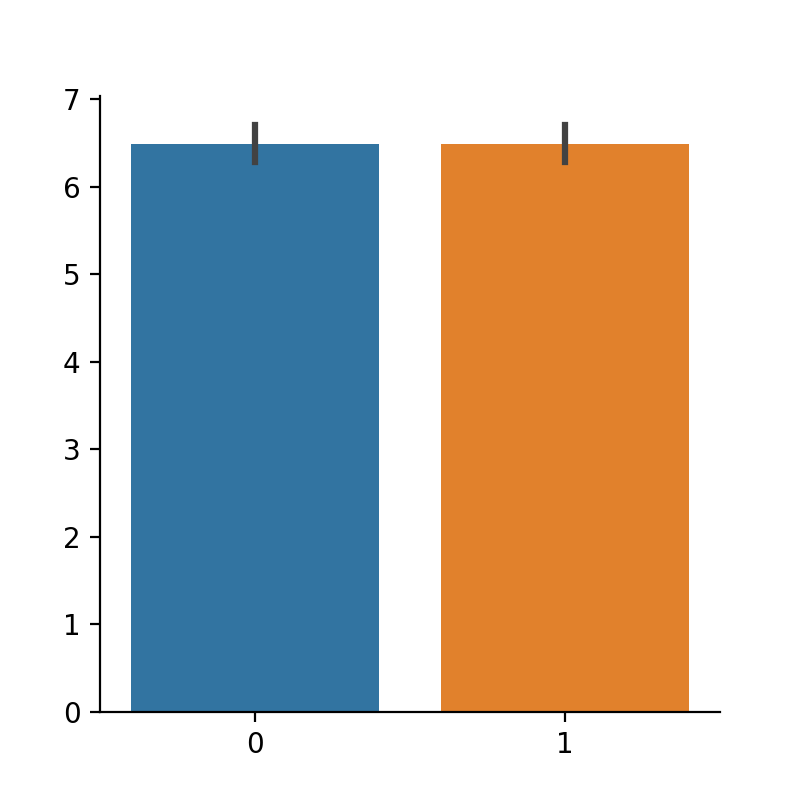

In [31]:
plt.figure(figsize=(4, 4))
sns.barplot([data1, data2], errorbar="se")
plt.show()

<IPython.core.display.Javascript object>


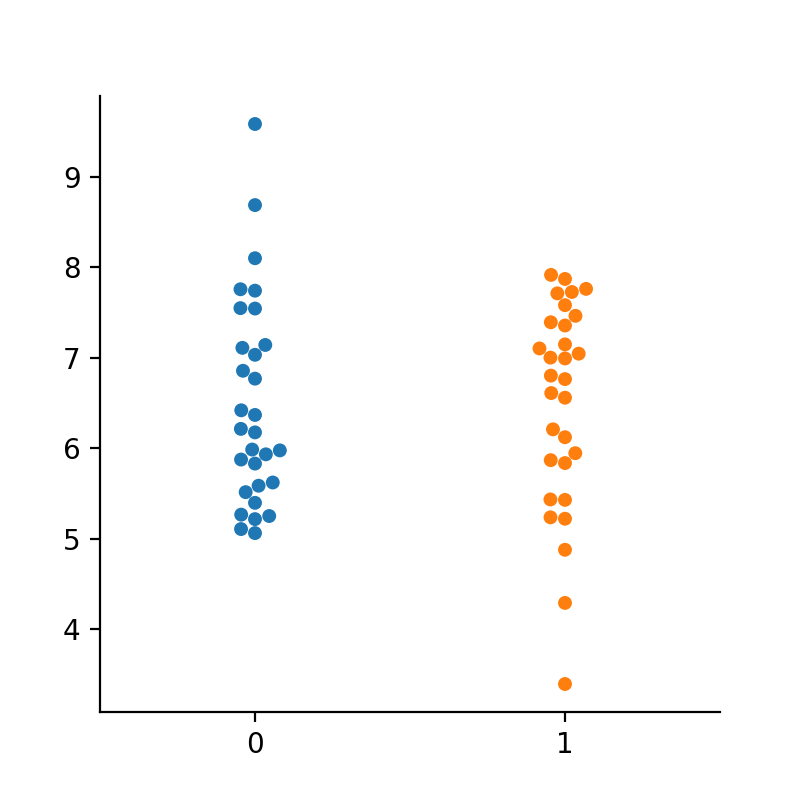

In [32]:
plt.figure(figsize=(4, 4))
sns.swarmplot([data1, data2])
plt.show()

    Respect each data point! 
  
They're costly and painful to get. If they're not out in your chart (and/or publicly available) they are lost forever!

### Mind y range in length-based representations!

If you REALLY want to use barplots alway start from 0!

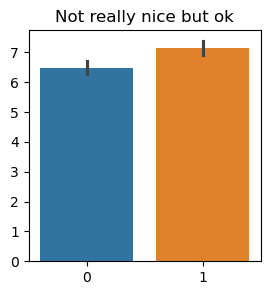

In [45]:
diff = 0.1  # percentage difference in the data
plt.figure(figsize=(3, 3))
sns.barplot([data1, data2*(1+diff)], errorbar="se")
plt.title("Not really nice but ok")
plt.show()

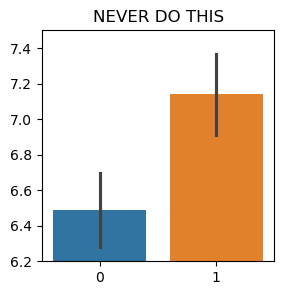

In [46]:
plt.figure(figsize=(3, 3))
sns.barplot([data1, data2*1.1], errorbar="se")
plt.ylim(6.2, 7.5)
plt.title("NEVER DO THIS")
plt.show()

## Remove the clutter

Try to keep your plot as clean as possible. Remove boxes. Whitespace is enough to separate panels! Remove axes not conveying information.

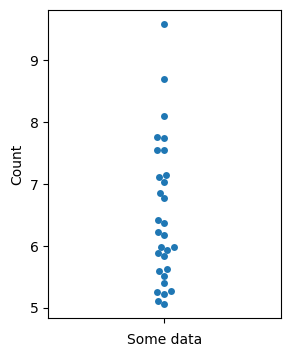

In [47]:
f, ax = plt.subplots(figsize=(3, 4))
sns.swarmplot(data1)

ax.set(xlabel="Some data", ylabel="Count")
plt.show()

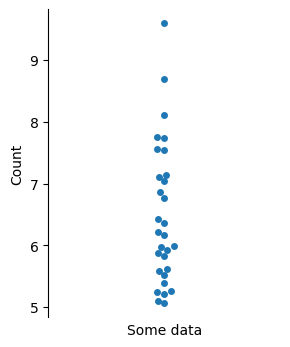

In [50]:
f, ax = plt.subplots(figsize=(3, 4))
sns.swarmplot(data1)
sns.despine(bottom=True)
ax.set(xlabel="Some data", ylabel="Count", xticks=[])
plt.show()

### Avoid redundancy!

Do not use different layers of information in a reduntant way:

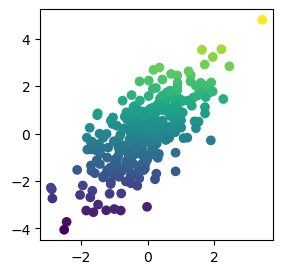

In [10]:
x = np.random.normal(0, 1, 300)
y = x + np.random.normal(0, 1, 300)
plt.figure(figsize=(3,3))
plt.scatter(x, y, c=y)
plt.show()

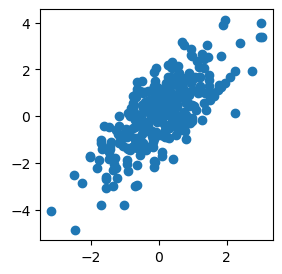

In [11]:
x = np.random.normal(0, 1, 300)
y = x + np.random.normal(0, 1, 300)
plt.figure(figsize=(3,3))
plt.scatter(x, y)
plt.show()

### Stratify information in the plot

Generally plots are good if they have a first clear message, and they can be further read to reveal more details:

<Axes: >

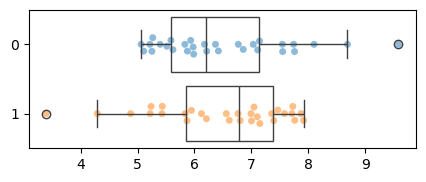

In [12]:
plt.figure(figsize=(5, 1.8))
sns.swarmplot([data1, data2], orient="h",zorder=-100,alpha=0.5)
sns.boxplot(pd.DataFrame({0: data1, 1: data2}), 
            boxprops={'facecolor':'none'}, orient="h")

### Link axes and colors

To convey more in a clearer way, use shared axes across plots!

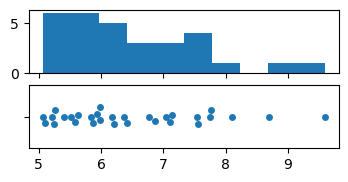

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(4, 1.8), sharex=True)
sns.swarmplot(data1, orient="h", ax=axs[1])
axs[0].hist(data1)
plt.show()

Also, stick to consistent coloring of data points across panels and, ideally, figures/presentations

## Colormaps!

Colormaps do not only have to be beautiful, but also informative

Conveying info through color can be tricky

### Perceptual linearity

Perceptual linearity is important! That's why you should avoid jet colormaps!

In [4]:
import numpy as np
from scipy.ndimage import gaussian_filter
np.random.seed(42)
img = np.random.normal(0, 1, (300, 300))
img = gaussian_filter(-img, 50)

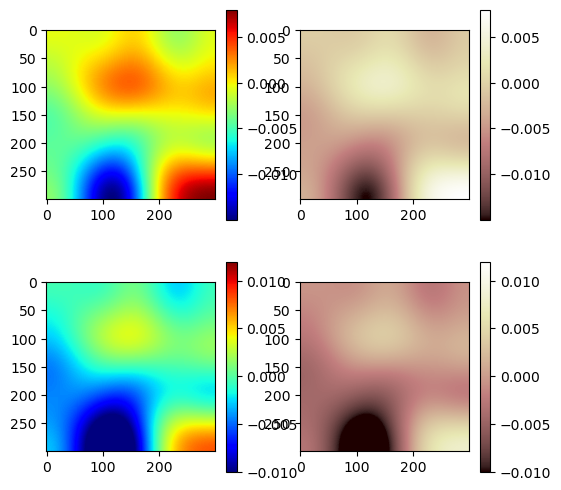

In [6]:
f, axs = plt.subplots(2,2,figsize=(6, 6))
for i, lims in enumerate([(0.008, None), (0.012, -0.01)]):
    for j, cmap in enumerate(["jet", "pink"]):
        im = axs[i, j].imshow(img, cmap=cmap, vmax=lims[0], vmin=lims[1])
        plt.colorbar(im)
        # axs[i, j].axis("off")  # remove axes all around

### Advanced colormap libraries

There's libraries offering more colormaps than default ones, with special attention to perceptual linearity:

- [seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)
- [colorcet](https://colorcet.holoviz.org/user_guide/index.html)
- [oceancm](https://matplotlib.org/cmocean/)

### Colormap choice

**sequential**: Stick to sequential colormaps for monotonic, positive (or negative)- only data

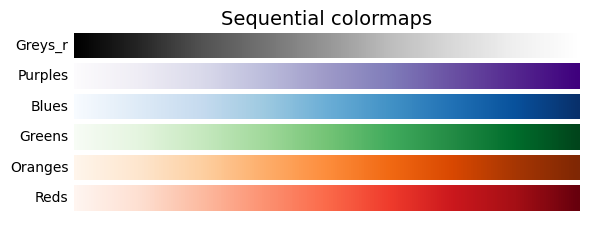

In [7]:
plot_color_gradients('Sequential',
                     ['Greys_r', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      ])

**Diverging**: Diverging colormaps represent quantities departing from an origin. Make sure the zero of your data is represented with the center color (white/gray)

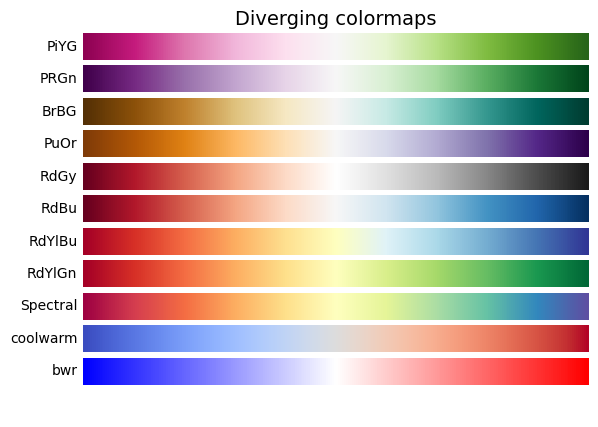

In [53]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr'])

**Cyclic**: Colormaps where both edges have same values. Useful for circular data (orientation, angles, phase...)

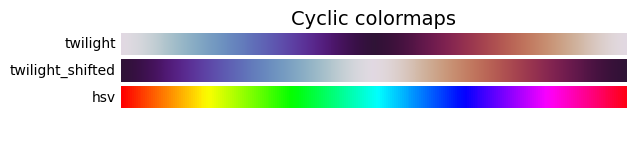

In [55]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

Or better, from `seaborn`:

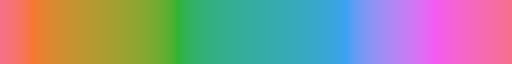

In [56]:
sns.husl_palette(as_cmap=True)

### Use divergent colormaps only for divergent data!

In [10]:
divergent_data = np.random.randn(100, 100) + 1
increasing_data = np.random.randint(0, 150, (100, 100))

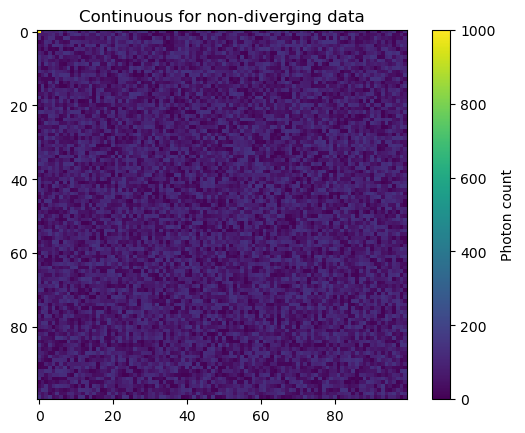

In [15]:
fig, ax = plt.subplots()
increasing_data[0, 0] = 1000
plt.title("Continuous for non-diverging data")
cax = ax.imshow(increasing_data, cmap="viridis")
fig.colorbar(cax, ax=ax, label="Photon count")
plt.show()

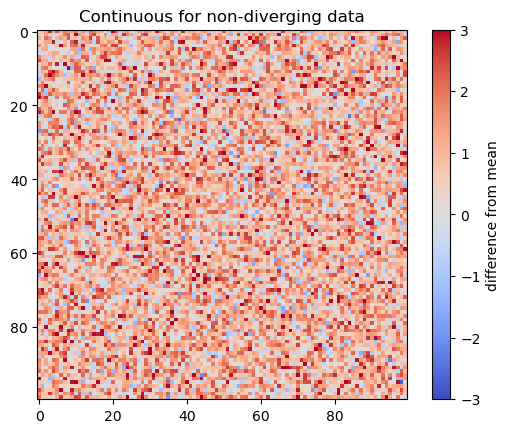

In [12]:
fig, ax = plt.subplots()
plt.title("Continuous for non-diverging data")
cax = ax.imshow(divergent_data, cmap="coolwarm", vmin=-3, vmax=3)
fig.colorbar(cax, ax=ax, label="difference from mean")
plt.show()

Examples of wrong usage of diverging maps:

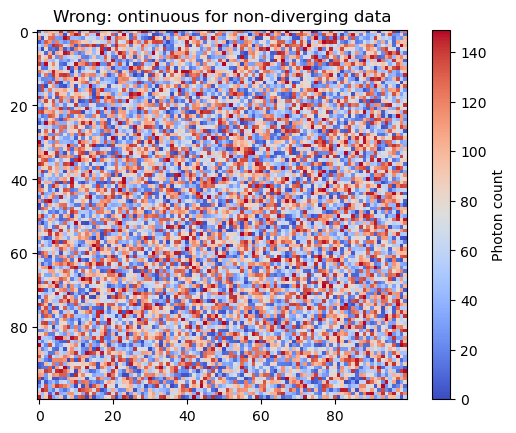

In [13]:
fig, ax = plt.subplots()
plt.title("Wrong: ontinuous for non-diverging data")
cax = ax.imshow(increasing_data, cmap="coolwarm")
fig.colorbar(cax, ax=ax, label="Photon count")
plt.show()

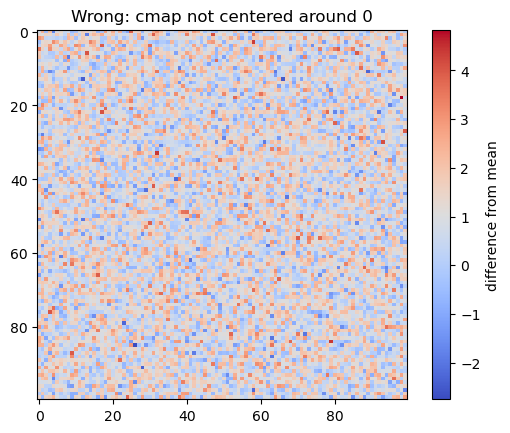

In [63]:
fig, ax = plt.subplots()
plt.title("Wrong: cmap not centered around 0")
cax = ax.imshow(divergent_data, cmap="coolwarm")
fig.colorbar(cax, ax=ax, label="difference from mean")
plt.show()

### Mind color blindness!

Try to avoid colormaps that are difficoult to parse for colorblind people!

In [17]:
# Generate divergent sample data
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
divergent_data = np.sin(3 * X) * np.cos(3 * Y)
# Generate continuous sample data
continuous_data = np.linspace(0, 1, 100).reshape(10, 10)  # Simple gradient for demonstration

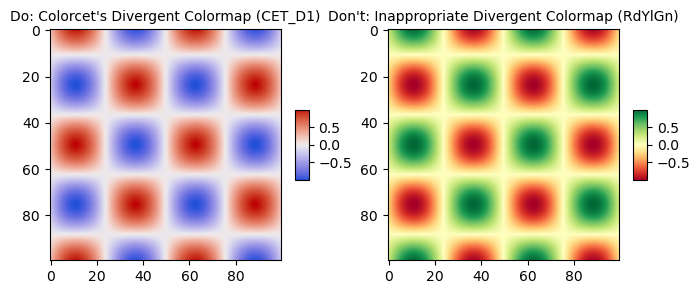

In [19]:
import colorcet as cc
plots = [{"data": divergent_data, "cmap": cc.cm['CET_D1'], "title": "Do: Colorcet's Divergent Colormap (CET_D1)"},
    {"data": divergent_data, "cmap": 'RdYlGn', "title": "Don't: Inappropriate Divergent Colormap (RdYlGn)"}]

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
for ax, plot in zip(axs.flat, plots):
    im = ax.imshow(plot["data"], cmap=plot["cmap"])
    ax.set_title(plot["title"], fontsize=10)
    fig.colorbar(im, aspect=5, fraction=0.05, ax=ax)

plt.show()

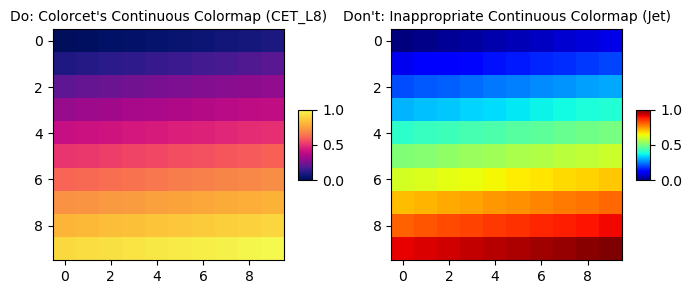

In [20]:
plots = [{"data": continuous_data, "cmap": cc.cm['CET_L8'], "title": "Do: Colorcet's Continuous Colormap (CET_L8)"},
    {"data": continuous_data, "cmap": 'jet', "title": "Don't: Inappropriate Continuous Colormap (Jet)"}]

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
for ax, plot in zip(axs.flat, plots):
    im = ax.imshow(plot["data"], cmap=plot["cmap"])
    ax.set_title(plot["title"], fontsize=10)
    fig.colorbar(im, aspect=5, fraction=0.05, ax=ax)

plt.show()

### Custom colormaps

We have seen colormaps when we learned about imshow. Matplotlib has many of them (see [here]( https://matplotlib.org/stable/tutorials/colors/colormaps.html )\)!

If you need a custom colormap, eg to integrate the plot better with an existing color scheme, you can create custom color maps! 

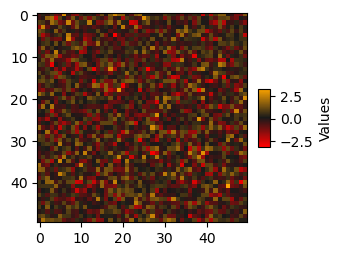

In [25]:
# Create new colormap with the LinearSegmentedColormap.from_list() method:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("myowncmap", ["red", ".1", "orange"])

plt.figure(figsize=(3, 3))
plt.imshow(np.random.normal(0, 1, (50, 50)), cmap=cmap)
plt.colorbar(aspect=5, fraction=0.05, label="Values")  # add colorbar with custom aspect ratio and size
plt.show()

Usually it is better to rely on cmaps designed by experts to be isoluminant!

# `matplotlib` pro usage

Let's introduce a bit more `matplotlib` and some more advanced tools there!

### Backends

Default Python would be text-only

To visualize images, we have to rely on <span style="color:indianred">backends</span>!

We can generate plots in a number of ways!

 - as panels opening up between notebooks' cells
 - as windows popping put when running a script
 - directly writing them as files
 - ...

Each of those use entirely different methods to render pixels on the screen...The backend is what takes care of converting plotting instructions into something that we can visualize

### Warning

Backends are often interfaces between Python code and other languages/programs/frameworks! Configuring/switching them sometimes can be confusing. 

Be patient and google them out!

### Interactive plots with different backends

Inside a notebook, we can specify different backends by using the magic notebook command
```python
%matplotlib name_of_the_backend
```

I recommend to use it only once at the beginning of the notebook!

In [26]:
## This is the default backend, which we get if we do not specify anything:
%matplotlib inline

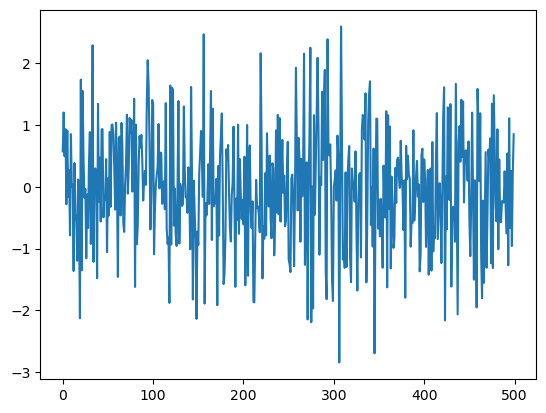

In [27]:
plt.figure()
plt.plot(np.random.normal(0, 1, 500))
plt.show()

### Other backends for interactive plots

<IPython.core.display.Javascript object>


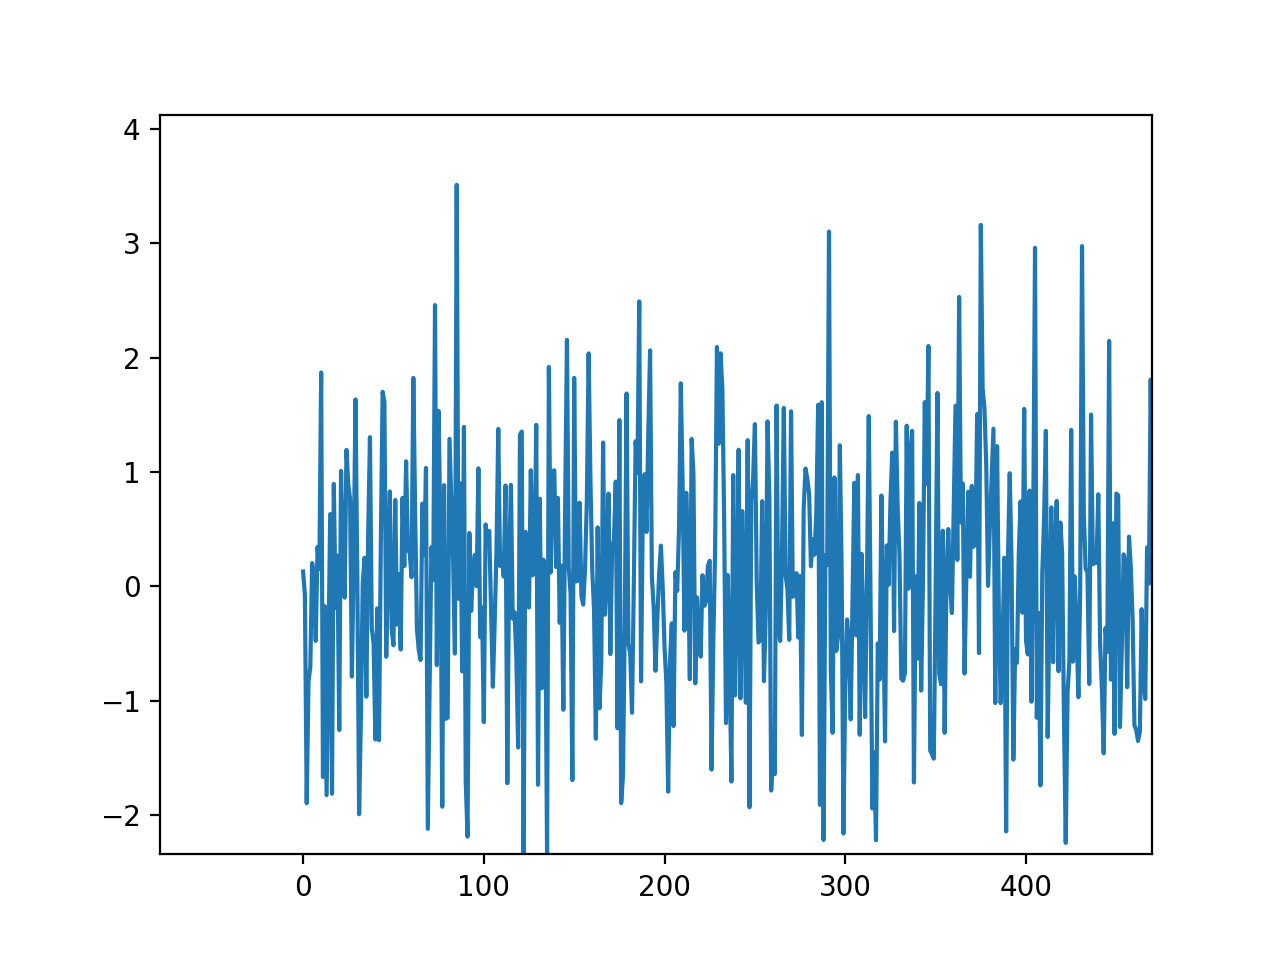

In [28]:
## This is the default interactive tool in jupyter notebooks
%matplotlib notebook

plt.figure()
plt.plot(np.random.normal(0, 1, 500))
plt.show()

In [70]:
# This is an even better interface that you can install:
%matplotlib widget

## Practical plot hacks

### Use matplotlib configuration tools!

We can change settings for all the plots that we are about to make in a notebook/script using configuration functions!

Check out [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html) a complete list of parameters you can change (the `matplotlibrc` file)

<IPython.core.display.Javascript object>


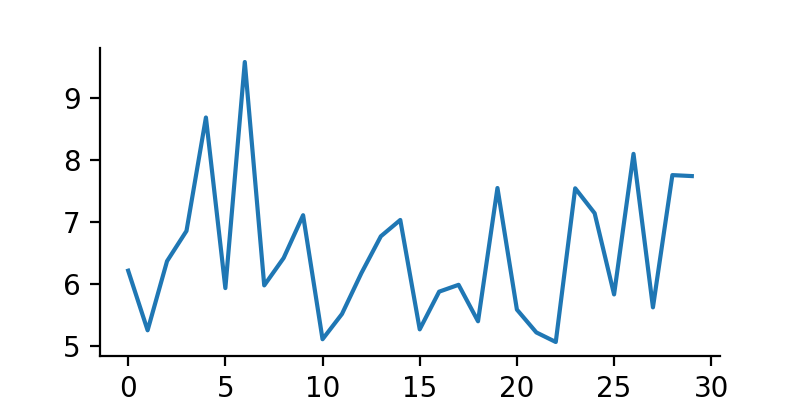

In [33]:
# For example, this switches permanently off the bounding box:
plt.rc('axes.spines', bottom=True, left=True, right=False, top=False)

plt.figure(figsize=(4, 2))
plt.plot(data1)
plt.show()

<IPython.core.display.Javascript object>


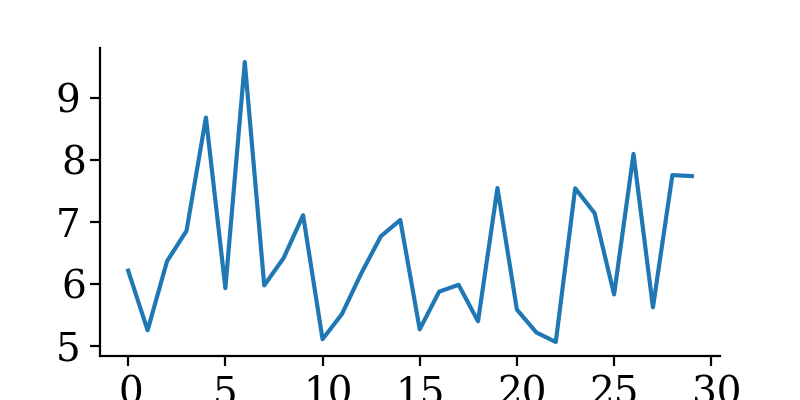

In [34]:
# We can change fonts, fontsizes, etc.
plt.rc('font', size=14, family="serif", serif="Palatino")
plt.figure(figsize=(4, 2))
plt.plot(data1)
plt.show()

In [35]:
# This restores defaults
plt.rcdefaults()

### Configuration files

Matplotlib has a bunch of different styles that you can choose from. Check them out [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)!

In [36]:
# To switch styles:
plt.style.use('dark_background')

<IPython.core.display.Javascript object>


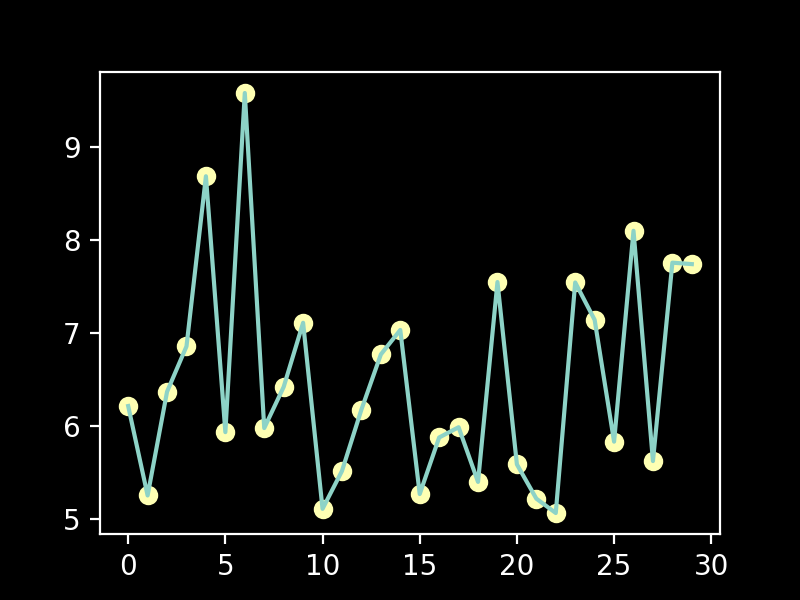

In [37]:
plt.figure(figsize=(4, 3))
plt.plot(data1)
plt.scatter(np.arange(len(data1)), data1, c="C1")
plt.show()

plt.style.use('default') # restore default

## Custom configuration files

We can also define custom style sheets! Highly advisable if we are generating figures for a paper across different scripts/notebooks. 

E.g., the `./lectures/files/example-stylesheet.mplstyle` contains the following:

    font.size : 14
    font.family : serif 
    font.serif : Palatino

<IPython.core.display.Javascript object>


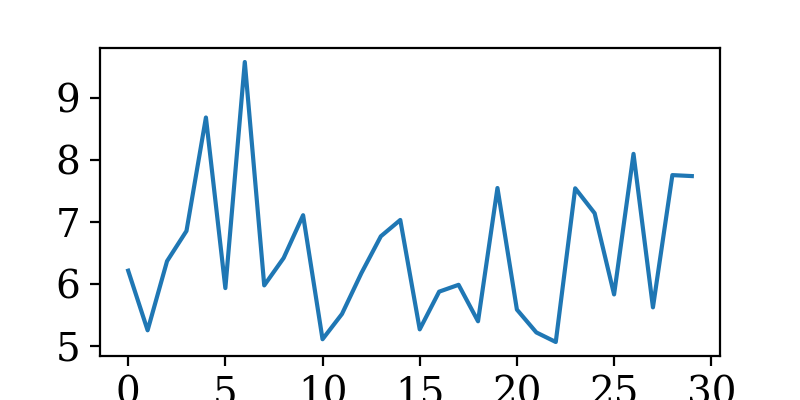

In [38]:
plt.style.use('./files/example-stylesheet.mplstyle')  # use custom stylesheet
plt.figure(figsize=(4, 2))
plt.plot(data1)
plt.show()

plt.rcdefaults()  # restore default

## `plt.subplots()`

For granular control over a plot's appearance, it can be usefult to open new figures with the `plt.subplots()` function with no arguments. This will create only one axis, but give us the object as well.

We can specify many things in the `gridspec_kw` dictionary argument!

<IPython.core.display.Javascript object>


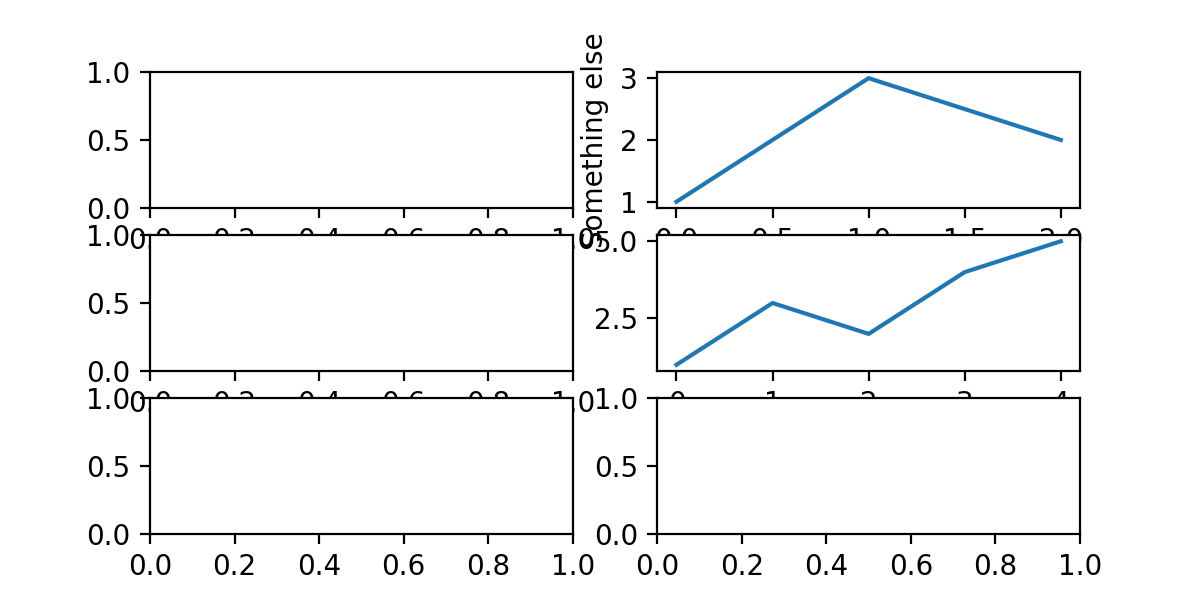

In [43]:
f, ax = plt.subplots(3, 2, figsize=(6, 3))
ax[0, 1].plot([1,3,2])
ax[0, 1].set(xlabel="Something", ylabel="Something else")
ax[1, 1].plot([1,3,2, 4, 5])

## Control multiple plots shapes

<IPython.core.display.Javascript object>


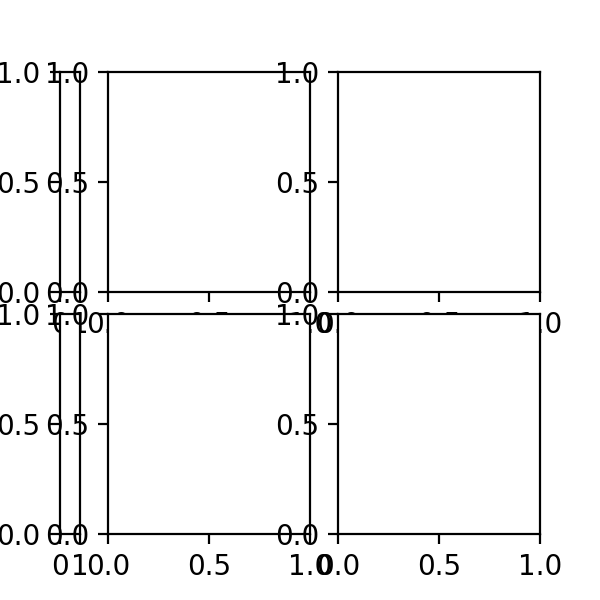

In [80]:
f, ax = plt.subplots(2, 3, figsize=(3, 3), 
         gridspec_kw=dict(left=0.1,  # left padding; also right, top, bottom abailable
                          width_ratios=[0.1, 1, 1],  # ratios of the plots, also "height_ratios"
                          hspace=0.1,  # space between plots over height; also wspace for width space
                          ))
# ax.set(xlabel="Something", ylabel="Something else")

## From plots to figures

General recommandation:

    Do **not** edit your figures in 
    Inkscape/illustrator after generating them!

Data changes all the times (new inclusions/exclusions, different preprocessing...). You do not want to manually edit figures multiple times!

### A good general approach

Define the plot appearance at the code level. This way if you have to make a similar figure or update if with new data (or new pipelines) it's 0 time and effort.

Illustrator can be use to compose the final figure just linking individual panels! In this way, consistent fontsizes, colors, linewidths, etc are ensured.

## Export figures

<IPython.core.display.Javascript object>


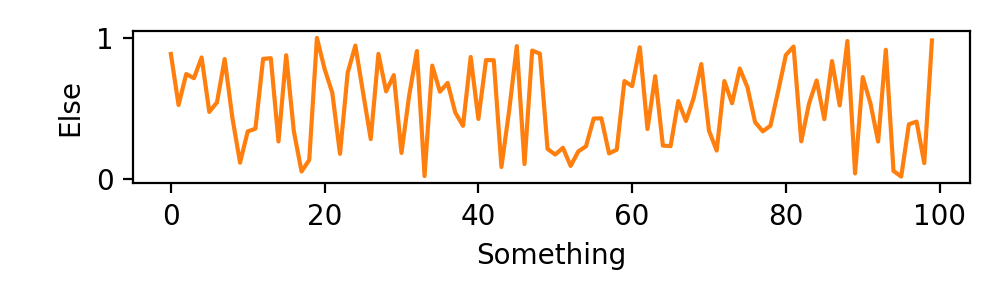

<IPython.core.display.Javascript object>


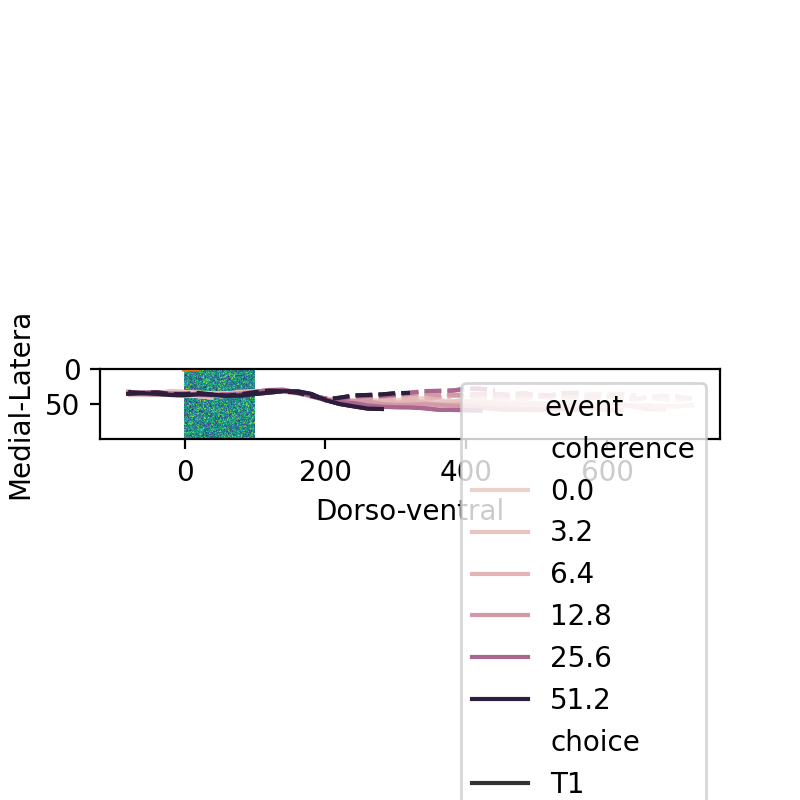

In [46]:
# alternative to get a figure object
# f = plt.figure()  #
f, axs = plt.subplots(figsize=(5, 1.5))
axs.plot(np.random.rand(100), c="C1")
axs.set(xlabel="Something", ylabel="Else")
plt.tight_layout()  # make sure everything fits in the plot

f.savefig("/Users/vigji/Desktop/fig1panelA.pdf")  # save

f, axs = plt.subplots(figsize=(4, 4))
axs.imshow(np.random.rand(100, 100))
axs.set(xlabel="Dorso-ventral", ylabel="Medial-Latera")
# plt.tight_layout()  # make sure everything fits in the plot

f.savefig("/Users/vigji/Desktop/fig1panelB.pdf")  # save


In [53]:
%matplotlib inline

## More from `seaborn`

A recap:

 - Great library for quick visualizations

 - super well integrated with `pandas`. works very well for datasets having the right shape. (Can be clunky otherwise)

 - we will look at only some functions. You should check out more in the [gallery](https://seaborn.pydata.org/examples/index.html)

### Advanced, multi-layer plots

`seaborn` offers also some complex, multi-element (and multi-axis) tool for composite visualizations. Explore them in the gallery, but beware! They tend to work only if you need exctly what they offer!

### lineplot with error bars

In [51]:
fmri = sns.load_dataset("fmri")
fmri#.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


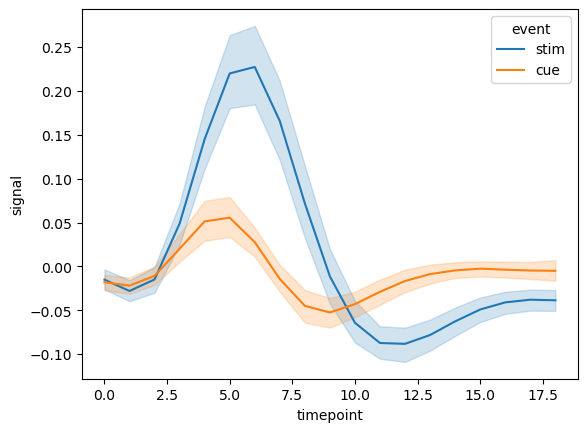

In [56]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")
plt.show()

### lineplot with colors based on feature

In [57]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots#.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


<Axes: xlabel='time', ylabel='firing_rate'>

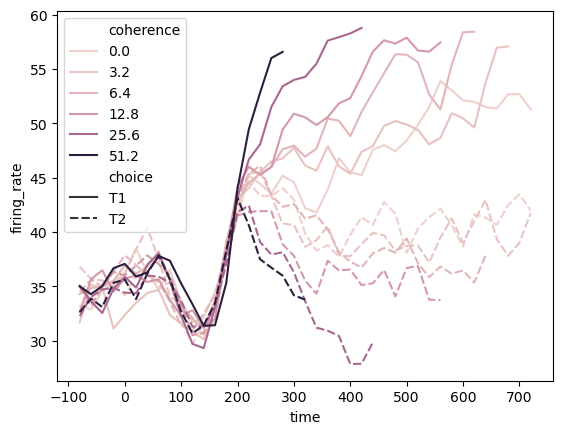

In [58]:
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice",
)

### Multiple linear regression plots

In [59]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


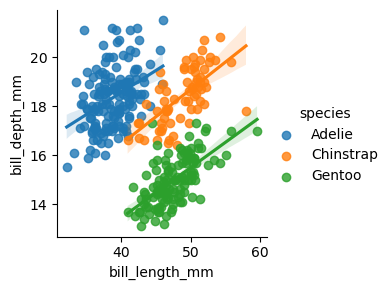

In [60]:
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=3
)

### KDE joint plot

<Figure size 640x480 with 0 Axes>

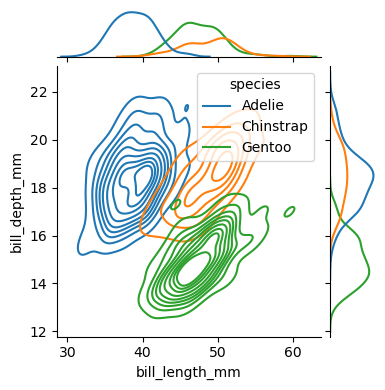

In [53]:
f = plt.figure()
# Show the joint distribution using kernel density estimation
g = sns.jointplot(data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",height=4
)

## `napari`

Napari is a truly awesome tool for 3D data/video visualization and annotation in Python

Developed by great people with state-of-the-art Python and open-source community management!

Works very well also integrated with notebooks.

### Use `napari` from notebooks

In [61]:
# Before starting, conda install "napari[all]". Pip installation could have issues on macOS!

# we allow the notebook to handle a parallel event loop for the interface (see last lecture!)
%gui qt5

In [62]:
import napari
import nibabel

In [64]:
img = nibabel.load("/Users/vigji/sample_data_folder/sub-001/ses-1/anat/sub-001_ses-1_acq-RARE_T2w.nii")
stack = img.get_fdata()
stack.shape

(120, 120, 48)

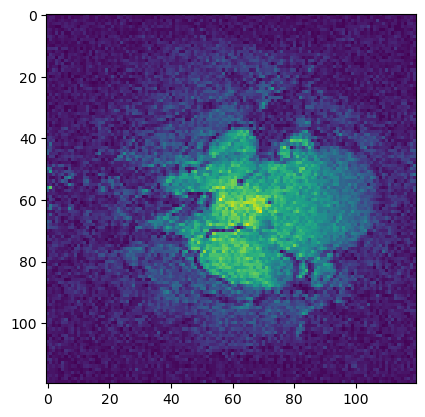

In [67]:
plt.figure()
plt.imshow(stack[:, :, 40])

In [68]:
viewer = napari.Viewer()

viewer.add_image(stack)

<Image layer 'stack' at 0x17fbd6a10>

In [39]:
stack.max()

32766.0

In [69]:
viewer.add_image(stack > 5000)

<Image layer 'Image' at 0x32550e6b0>

In [73]:
viewer.layers["Points"].data

array([[65.99420261, 87.26093067, 31.        ],
       [43.30017911, 69.99063606, 31.        ],
       [55.57493396, 41.15923513, 31.        ],
       [56.14585279, 46.44023431, 29.        ],
       [43.72836823, 75.69982436, 29.        ],
       [74.41525536, 83.83541769, 29.        ]])

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 496, in mousePressEvent
    self._vispy_mouse_press(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 184, in _vispy_mouse_press
    ev = self._vispy_canvas.events.mouse_press(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1201, in on_mouse_press
   

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

Traceback (most recent call last):
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/backends/_qt.py", line 526, in mouseMoveEvent
    self._vispy_mouse_move(
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/app/base.py", line 216, in _vispy_mouse_move
    ev = self._vispy_canvas.events.mouse_move(**kwargs)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "/Users/vigji/miniconda3/envs/course-env/lib/python3.10/site-packages/napari/_qt/qt_viewer.py", line 1211, in on_mouse_move
    self

In [45]:
points.data

array([[  50.93338206,    0.        ,   39.51982131, 1551.        ],
       [  71.7202729 ,    0.        ,   39.70879305, 1551.        ],
       [  75.68867933,    0.        ,   76.55828135, 1551.        ],
       [  52.63412768,    0.        ,   77.69211175, 1551.        ]])

## Course wrapup

## Take home messages

 - Use Python whenever you can...

- But if you don't, don't use MATLAB for statistics!

- Use GitHub, and publish your code (not on GitHub)

- Blow up dynamite plot! Together we can!

### Remaining deadlines



 - **30 Aug 2024** for the project 
 - I'll send another module for feedback around

## And now... 

##                🍻 ...beer! 🍻

## Addendum: nsure Illustrator/inkscape compatible text:

If we directly open those pdfs in illustrator, we will have funny text (each letter a different box). To fix we have to edit matplotlib config (you can do it in your custom style-sheet!)

In [ ]:
plt.rc("pdf", fonttype=42)  # I swear the number to put here is actually 42...
plt.rc("ps", fonttype=42)

In [ ]:
f.savefig("/Users/vigji/Desktop/testfig2.pdf")